# Import modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

# Loading the dataset

In [3]:
flow = pd.read_csv('C:\\Users\\USER\\Desktop\\weth\\flow_2017.csv')
humid = pd.read_csv('C:\\Users\\USER\\Desktop\\weth\\humidity_2017.csv')
temp = pd.read_csv('C:\\Users\\USER\\Desktop\\weth\\temperature_2017.csv')
weight = pd.read_csv('C:\\Users\\USER\\Desktop\\weth\\weight_2017.csv')

In [4]:
print(flow.head())
print(humid.head())
print(temp.head())
print(weight.head())

             timestamp  flow
0  2017-01-01 05:15:00     0
1  2017-01-01 05:16:00     0
2  2017-01-01 05:17:00     0
3  2017-01-01 05:18:00     0
4  2017-01-01 05:19:00     0
             timestamp   humidity
0  2017-01-01 05:00:00  92.406667
1  2017-01-01 06:00:00  92.270000
2  2017-01-01 07:00:00  92.575000
3  2017-01-01 08:00:00  92.840000
4  2017-01-01 09:00:00  93.640000
             timestamp  temperature
0  2017-01-01 05:00:00    -1.911244
1  2017-01-01 06:00:00    -1.866717
2  2017-01-01 07:00:00    -2.077833
3  2017-01-01 08:00:00    -2.327167
4  2017-01-01 09:00:00    -2.791233
             timestamp   weight
0  2017-01-01 05:15:00  52.6974
1  2017-01-01 05:16:00  52.6974
2  2017-01-01 05:17:00  52.6974
3  2017-01-01 05:18:00  52.6974
4  2017-01-01 05:19:00  52.6973


In [5]:
timestamp = flow['timestamp']
flow_1 = flow['flow']
humid_1 = humid['humidity']
temp_1 = temp['temperature']
weight_1 = weight['weight']


In [6]:
print(flow_1.count())
print(humid_1.count())
print(temp_1.count())
print(weight_1.count())

1048220
8737
401866
524110


In [7]:
finaldf = pd.concat([flow_1, humid_1, temp_1, weight_1], axis=1, join='inner').sort_index()

<AxesSubplot:>

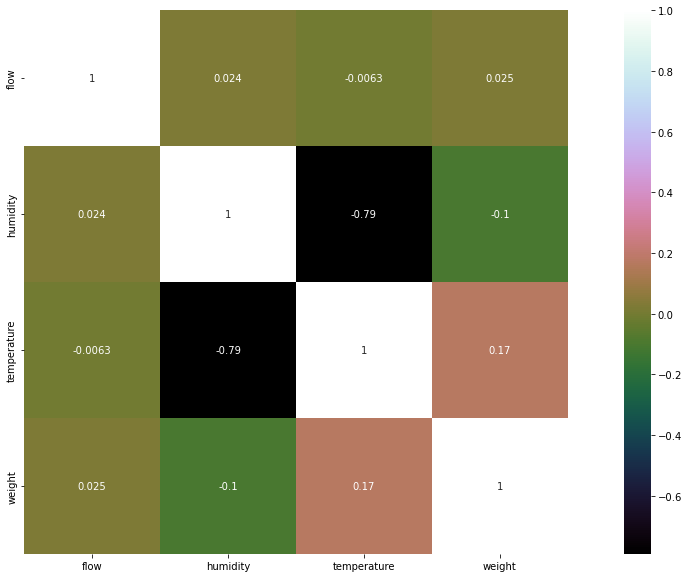

In [8]:

corr_mat = finaldf.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

In [9]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model_lm = ols('flow ~ humidity + temperature + weight', 
               data = finaldf).fit()
aov_table = sm.stats.anova_lm(model_lm, typ=2)
print(aov_table)

esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
print('\n',esq_sm)

                sum_sq      df         F    PR(>F)
humidity      0.057023     1.0  7.392333  0.006563
temperature   0.018071     1.0  2.342661  0.125911
weight        0.040979     1.0  5.312442  0.021197
Residual     67.364194  8733.0       NaN       NaN

 0.7593566874198747


In [10]:
X = finaldf[["humidity","temperature","weight"]].head(8737)
y = flow_1.head(8737)
print(X.describe())
print('\n', y.describe())


model = sm.OLS(y,X).fit()

pred = model.predict(X)

print(model.summary())
print(model.params)

          humidity  temperature       weight
count  8737.000000  8737.000000  8737.000000
mean     74.897176    16.506131    52.565870
std      15.596232    10.510292     0.376954
min     -66.710000    -6.607883    47.127900
25%      61.863167     7.206083    52.570100
50%      79.757667    16.540000    52.633200
75%      87.646667    25.171167    52.666900
max      99.651667    35.733333    52.953200

 count    8737.000000
mean       -0.007783
std         0.087882
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.000000
Name: flow, dtype: float64
                                 OLS Regression Results                                
Dep. Variable:                   flow   R-squared (uncentered):                   0.009
Model:                            OLS   Adj. R-squared (uncentered):              0.008
Method:                 Least Squares   F-statistic:                              25.29
Date:                Thu, 16 Mar 2023   Prob (

In [13]:
#Logistic Regression 
from sklearn.linear_model import LogisticRegression 

In [14]:

clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X, y)
print(clf.predict_proba(X))
print(clf.score(X, y))

[[0.00753854 0.99246146]
 [0.00755889 0.99244111]
 [0.00753756 0.99246244]
 ...
 [0.00532375 0.99467625]
 [0.00521269 0.99478731]
 [0.00529305 0.99470695]]
0.9922170081263592


In [18]:
#Bayesian
from sklearn.linear_model import BayesianRidge

In [22]:

clf2 =BayesianRidge()
print(clf2.fit(X,y))
print(clf2.predict(X))

BayesianRidge()
[-0.00737045 -0.00739665 -0.00736673 ... -0.00538014 -0.00512439
 -0.00527294]


In [25]:
import seaborn as sns
X = finaldf[["humidity","temperature"]].head(8737)
y = weight_1.head(8737)
print(X.describe())
print('\n', y.describe())
print("\n Regression of Weight")
model = sm.OLS(y,X).fit()

pred = model.predict(X)

print(model.summary())
print(model.params)

print("\n")
print("ANOVA")
model_lm = ols('weight ~ humidity + temperature', 
               data = finaldf).fit()

aov_table = sm.stats.anova_lm(model_lm, typ=2)
print(aov_table)

esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
print('\n',esq_sm)

          humidity  temperature
count  8737.000000  8737.000000
mean     74.897176    16.506131
std      15.596232    10.510292
min     -66.710000    -6.607883
25%      61.863167     7.206083
50%      79.757667    16.540000
75%      87.646667    25.171167
max      99.651667    35.733333

 count    8737.000000
mean       52.565870
std         0.376954
min        47.127900
25%        52.570100
50%        52.633200
75%        52.666900
max        52.953200
Name: weight, dtype: float64

 Regression of Weight
                                 OLS Regression Results                                
Dep. Variable:                 weight   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          4.410e+05
Date:                Thu, 16 Mar 2023   Prob (F-statistic):                        0.00
Time:                        18:05:38   Log-Likeli